### 0.데이터 다운로드

In [13]:
!git clone https://github.com/Soyoung-Yoon/data_02

Cloning into 'data_02'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 72 (delta 7), reused 0 (delta 0), pack-reused 47
Receiving objects: 100% (72/72), 448.82 KiB | 1.16 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [2]:
import scipy
scipy.__version__

'1.10.1'

In [ ]:
!pip install scipy==1.10.0

### 확률분포 그리기

### 1.이산형 확률분포 
- Probability Mass Function, PMF, 𝐲=𝒇(𝒙)
- 이산 확률 변수에서 특정 값에 대한 확률을 계산하기 위한 함수

#### 1-1.기하 분포

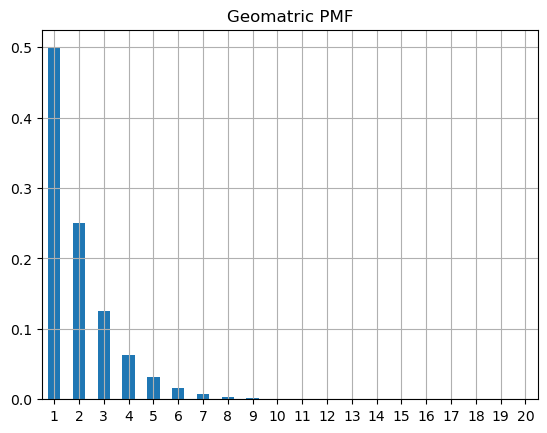

In [9]:
# 확률이 0.1인 기하분포
from scipy.stats import geom
import pandas as pd
import matplotlib.pyplot as plt

p = 0.5
x = range(1, 21)
y = geom(p=p).pmf(x)

pd.Series(data=y, index=x).plot(kind='bar', title='Geomatric PMF', rot=0, grid=True)
plt.show()

#### 1-2.초기하 분포

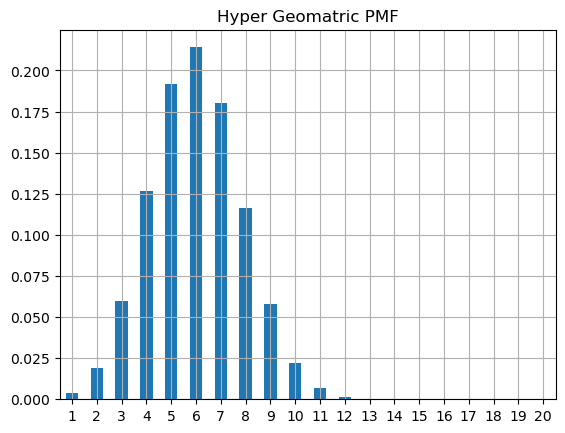

In [13]:
# M : 모집단 개수, n : 성공요소의 수, N : 시행횟수(선택 횟수)
# M, n, N = 100, 30, 20
from scipy.stats import hypergeom
import pandas as pd
import matplotlib.pyplot as plt

a, b, c = 100, 30, 20
x = range(1, 21)
y = hypergeom(M=a, n=b, N=c).pmf(x)

pd.Series(data=y, index=x).plot(kind='bar', title='Hyper Geomatric PMF', rot=0, grid=True)
plt.show()

#### 1-3.포아송 분포

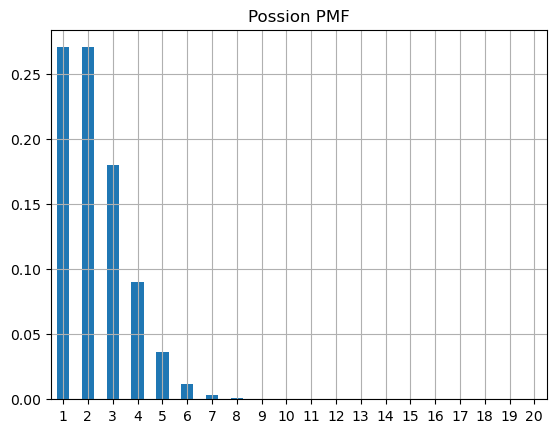

In [16]:
# mu = 단위/공간당 평균 발생 횟수
# 평균 2회 발생 횟수를 갖는 포아송 분포
from scipy.stats import poisson
import pandas as pd
import matplotlib.pyplot as plt

mu = 2
x = range(1, 21)
y = poisson(mu=mu).pmf(x)

pd.Series(data=y, index=x).plot(kind='bar', title='Possion PMF', rot=0, grid=True)
plt.show()

### 2.연속형 확률분포 객체 생성

PDF(Probability Density Function) : 확률 밀도 함수
- 연속적인 변수에 의한 확률 분포 함수
- 항상 양의 값을 가져야 하며, 모든 범위의 PDF를 합한 값은 1임
- f(x) >= 0
- 분포내 특정 값에서의 확률은 0, P(X=a) = 0, 정의된 범위 내에서의 확률은 범위내의 pdf 영역 넓이(적분값)가 됨

#### 2-1. 표준정규분포

In [47]:
from scipy.stats import norm

Z=1.96
rv = norm(loc=0, scale=1)

print(rv.cdf(Z), rv.cdf(-Z), rv.ppf(0.975), rv.ppf(0.025))

0.9750021048517795 0.024997895148220435 1.959963984540054 -1.9599639845400545


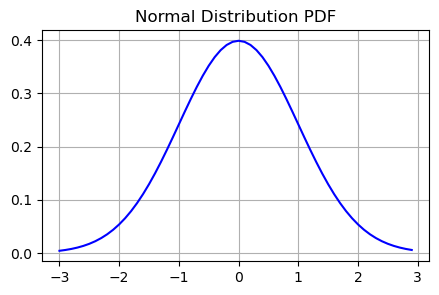

In [43]:
# 표준정규분포 객체 생성 및 그래프 그리기
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.1)
y = norm(loc=0, scale=1).pdf(x)

pd.Series(data=y, index=x).plot(title='Normal Distribution PDF', style='b-', grid=True, figsize=(5,3))
plt.show()

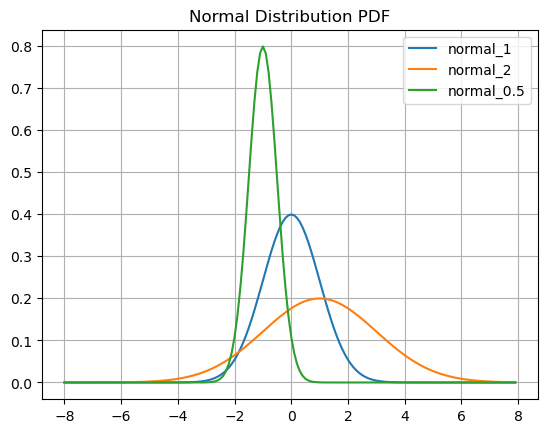

In [56]:
# 표준정규분포 객체 생성 및 그래프 그리기 - loc, scale 대응
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mloc, mscale = 0, 1

x = np.arange(mloc - 8 * mscale, mloc + 8 * mscale, 0.1)

df = pd.DataFrame()
df[f'normal_{mscale}'] = pd.Series(data=norm(loc=mloc, scale=mscale).pdf(x), index=x)
df[f'normal_{2 * mscale}'] = pd.Series(data=norm(loc=mloc+1, scale=2*mscale).pdf(x), index=x)
df[f'normal_{0.5 * mscale}'] = pd.Series(data=norm(loc=mloc-1, scale=0.5*mscale).pdf(x), index=x)

df.plot(title='Normal Distribution PDF', grid=True)

plt.show()

#### 2-2. Student t 분포

In [1]:
from scipy.stats import t
help(t)

Help on t_gen in module scipy.stats._continuous_distns object:

class t_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  t_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A Student's t continuous random variable.
 |  
 |  For the noncentral t distribution, see `nct`.
 |  
 |  %(before_notes)s
 |  
 |  See Also
 |  --------
 |  nct
 |  
 |  Notes
 |  -----
 |  The probability density function for `t` is:
 |  
 |  .. math::
 |  
 |      f(x, \nu) = \frac{\Gamma((\nu+1)/2)}
 |                      {\sqrt{\pi \nu} \Gamma(\nu/2)}
 |                  (1+x^2/\nu)^{-(\nu+1)/2}
 |  
 |  where :math:`x` is a real number and the degrees of freedom parameter
 |  :math:`\nu` (denoted ``df`` in the implementation) satisfies
 |  :math:`\nu > 0`. :math:`\Gamma` is the gamma function
 |  (`scipy.special.gamma`).
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      t_gen
 |     

In [1]:
from scipy.stats import t
help(t)

Help on t_gen in module scipy.stats._continuous_distns object:

class t_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  t_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A Student's t continuous random variable.
 |  
 |  For the noncentral t distribution, see `nct`.
 |  
 |  %(before_notes)s
 |  
 |  See Also
 |  --------
 |  nct
 |  
 |  Notes
 |  -----
 |  The probability density function for `t` is:
 |  
 |  .. math::
 |  
 |      f(x, \nu) = \frac{\Gamma((\nu+1)/2)}
 |                      {\sqrt{\pi \nu} \Gamma(\nu/2)}
 |                  (1+x^2/\nu)^{-(\nu+1)/2}
 |  
 |  where :math:`x` is a real number and the degrees of freedom parameter
 |  :math:`\nu` (denoted ``df`` in the implementation) satisfies
 |  :math:`\nu > 0`. :math:`\Gamma` is the gamma function
 |  (`scipy.special.gamma`).
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      t_gen
 |     

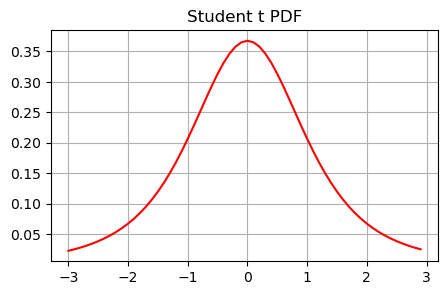

In [5]:
# Student t 분포 객체 생성 및 그래프 그리기
from scipy.stats import t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = 3
rv = t(df=df)
x = np.arange(-3, 3, 0.1)
y1 = rv.pdf(x)
y2 = t.pdf(x, df=df)

pd.Series(data=y1, index=x).plot(title='Student t PDF', figsize=(5,3), grid=True, style='r-')
plt.show()

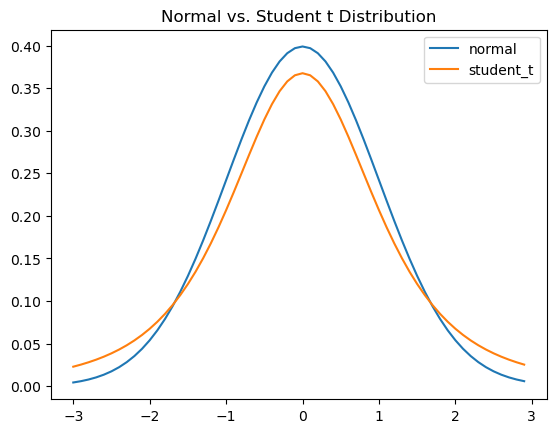

In [12]:
# 표준정규분포와 스튜던트 t 분표 비교
from scipy.stats import norm, t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n_rv = norm(loc=0, scale=1)
t_rv = t(loc=0, scale=1, df=3)
x = np.arange(-3, 3, 0.1)

df = pd.DataFrame()
df['normal'] = pd.Series(data=n_rv.pdf(x), index=x)
df['student_t'] = pd.Series(data=t_rv.pdf(x), index=x)

df.plot(title='Normal vs. Student t Distribution')
plt.show()

#### 2-3.지수분포


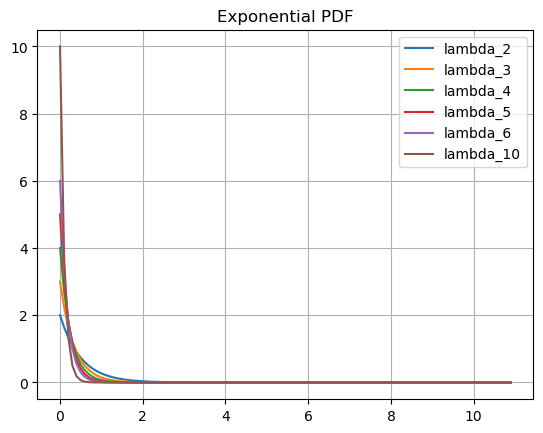

In [17]:
# Exponential(지수)분포 객체 생성 및 그래프 그리기
from scipy.stats import expon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 11, 0.1)

df = pd.DataFrame()
df['lambda_2'] = pd.Series(data=expon(scale=1/2).pdf(x), index=x)
df['lambda_3'] = pd.Series(data=expon(scale=1/3).pdf(x), index=x)
df['lambda_4'] = pd.Series(data=expon(scale=1/4).pdf(x), index=x)
df['lambda_5'] = pd.Series(data=expon(scale=1/5).pdf(x), index=x)
df['lambda_6'] = pd.Series(data=expon(scale=1/6).pdf(x), index=x)
df['lambda_10'] = pd.Series(data=expon(scale=1/10).pdf(x), index=x)
df.plot(title='Exponential PDF', grid=True)
plt.show()

#### 2-4.감마분포

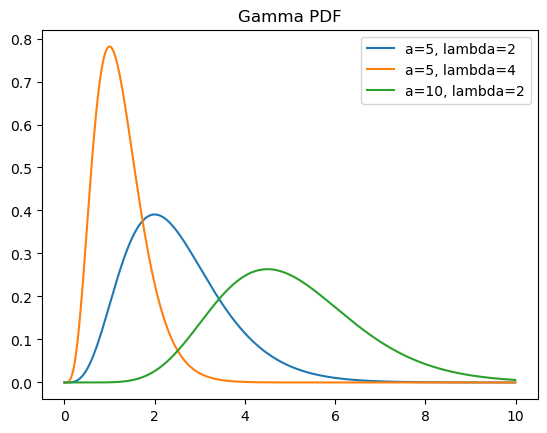

In [32]:
# Gamma(감마)분포 객체 생성 및 그래프 그리기
from scipy.stats import gamma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.01)

df = pd.DataFrame()
df[f'a=5, lambda=2'] = pd.Series(data=gamma(a=5, scale=1/2).pdf(x), index=x)
df[f'a=5, lambda=4'] = pd.Series(data=gamma(a=5, scale=1/4).pdf(x), index=x)
df[f'a=10, lambda=2'] = pd.Series(data=gamma(a=10, scale=1/2).pdf(x), index=x)
df.plot(title='Gamma PDF')

plt.show()

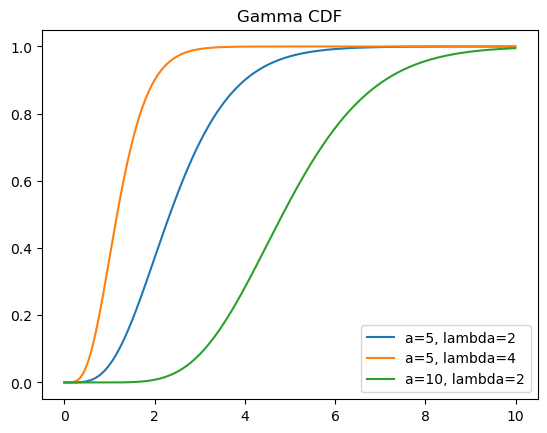

In [37]:
from scipy.stats import gamma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.01)

df = pd.DataFrame()
df[f'a=5, lambda=2'] = pd.Series(data=gamma(a=5, scale=1/2).cdf(x), index=x)
df[f'a=5, lambda=4'] = pd.Series(data=gamma(a=5, scale=1/4).cdf(x), index=x)
df[f'a=10, lambda=2'] = pd.Series(data=gamma(a=10, scale=1/2).cdf(x), index=x)
df.plot(title='Gamma CDF')

plt.show()

### 3.이산형 확률분포 문제

CDF(Cumulative Distribution Function) : 누적 분포 함수
- 어떤 확률 분포에 대해 확률 변수가 특정 값보다 작거나 같은 확률
- f(x) = P(X <= x)
- CDF를 미분하면 PDF, PDF를 적분하면 CDF가 됨

### 3-1.기하분포 활용문제


#### 3-1a.이하일 확률
- geom(p).cdf(x)
- A씨가 계란후라이를 만들 때 노른자를 깨지 않을 확률이 0.2라고 한다. A씨가 적어도 5번 이내에 노른자를 깨지 않을 확률을 구하시오.

In [17]:
from scipy.stats import geom

print(geom(p=0.2).cdf(5))

0.67232


#### 3-1b.이상일 확률
- 1 - geom(p).cdf(x)
- 빅데이터분석기사 실기 합격률은 35%라고 한다. 이 시험에 2번 이상 응시해야 자격증 취득에 성공할 확률을 구하시오.

In [18]:
from scipy.stats import geom

print(1 - geom(p=0.35).cdf(2-1))

0.65


#### 3-1c. 특정 횟수일 확률
- geom(p).cdf(x) - geom(p).cdf(x-1)
- A 야구선수의 홈런 칠 확률이 5%일 때, 이 선수가 4번째 타석에서 홈런 칠 확률을 구하시오.

In [10]:
from scipy.stats import geom

print(f'{geom(p=0.05).pmf(4):,.4f}')

0.0429


###3-2.초기하분포 활용문제

#### 3-2a.이하일 확률
- hypergeom(M, n, N).cdf(x)
- 어느 회사에서 랜덤박스 선물셋트를 50개 준비했다. 선물셋트에 향수가 포함된 것이 8개 라고 한다. 비복원추출로 선물셋트 4개를 뽑았을 때, 향수가 포함된 선물이 2개 이하로 나올 확률을 구하시오.

In [20]:
from scipy.stats import hypergeom

print(hypergeom(M=50,n=8,N=4).cdf(2))

0.989483282674772


#### 3-2b.이상일 확률
- 1 - hypergeom(M, n, N).cdf(x)
- 짱구엄마가 사과 20개와 배 8를 사왔다. 비복원추출로 사과와 배 5개를 집었을 때 배가 2개 이상일 확률을 구하시오.

In [21]:
from scipy.stats import hypergeom

print(1 - hypergeom(M=28,n=8,N=5).cdf(2-1))

0.44786324786324794


#### 3-3c.특정 횟수일 확률
- hypergeom(M, n, N).cdf(x) - hypergeom(M, n, N).cdf(x-1)
- 뽑기 기계에 꽝이 아닌 것이 10개, 꽝이 30개 포함되어 있다고 한다. 비복원추출로 4개를 뽑았을 때 이중 꽝이 아닌 것이 3개 나올 확률을 구하시오.

In [24]:
from scipy.stats import hypergeom

print(hypergeom(M=40,n=10,N=4).pmf(3))

0.03939161833898677


### 3-3.포아송분포 활용문제

#### 3-3a.이하일 확률
- poisson(mu).cdf(x)
- 어느 AS센터에 1시간당 평균 180건의 전화가 온다. 이때 1분 동안 걸려오는 전화 요청이 4건 이하일 확률을 구하시오.

In [26]:
from scipy.stats import poisson

print(poisson(mu=180/60).cdf(4))

0.8152632445237722


In [ ]:
help(poisson)

####3-3b.이상일 확률
- 1- poisson(mu).cdf(x)
- 어느 가게에 1시간당 평균 8명의 손님이 온다. 이때, 1시간 동안 손님이 6명 이상 올 확률을 구하시오.

In [27]:
from scipy.stats import poisson

print(1 - poisson(mu=8).cdf(6-1))

0.8087639379203747


#### 3-3c.특정 개수일 확률
- poisson(mu).cdf(x) - poisson(mu).cdf(x-1)
- 출판사에서 원고 검수를 6 페이지 하였는데 오타가 총 12개 발견되었다고 한다. 이 원고에서 어떤 한 페이지를 검수하였을 때, 오타가 2개 나올 확률을 구하시오.


### 4.연속형 확률분포 문제

### 4-1.정규분포 활용문제
- loc : 평균, scale : 표준편차
- x (확률변수) : 평균


#### 4-1a.이하일 확률
- norm(loc=평균, scale=표준편차).cdf(x) 사용
- Z회사의 USB 수명을 조사하였더니 USB의 평균 수명은 5000시간이고, 표준편차가 100시간인 정규분포를 따른다고 한다. USB의 수명이 4800시간 이하일 확률을 구하시오
 


In [59]:
from scipy.stats import norm

rv = norm(loc=5000, scale=100)
y = rv.cdf(4800)
print(y.round(4))

0.0228


#### 4-1b.이상일 확률
- 1 - norm(loc=평균, scale=표준편차).cdf(x) 사용
- A씨는 냉장고의 수명을 조사하였다. 냉장고의 평균 수명은 10년이고, 표준편차가 2년인 정규분포를 따른다고 한다.  냉장고의 수명이 14년 이상일 확률을 구하시오.


In [61]:
from scipy.stats import norm

rv = norm(loc=10, scale=2)
y = 1 - rv.cdf(14)
print(y.round(4))

0.0228


#### 4-1c.특정 구간일 확률
- norm(loc=평균, scale=표준편차).cdf(큰값) - norm(loc=평균, scale=표준편차).cdf(작은값)
- X회사에서 생산되는 계란은 평균 무게가 80g 이고 분산이 100g인 정규분포를 따른다고 한다. 계란의 평균 무게가 55g ~ 90g일 확률을 구하시오.


In [62]:
from scipy.stats import norm
import numpy as np

mu, std = 80, np.sqrt(100)
rv = norm(loc=mu, scale=std)
print((rv.cdf(90) - rv.cdf(55)).round(4))

0.8351


#### 4-1d.정규분포 신뢰구간 
- (통계량 – 오차한계) ~ (통계량 + 오차한계)
- 오차한계 = 표본오차, 임계값 * 𝜎/√𝑛 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
- norm.interval(confidence, loc=mu, scale=stderr)
- norm.ppf((1+confidence)/2, loc=mu, scale=stderr)
- scipy.stats.sem(data)로 stderr 구하기 가능


어느 배 농장에서 수확한 배의 평균 무게(𝝁)에 대해 알아보기 위해 36개의 배를 추출하여 무게를측정하였더니 평균이 602g, 표준편차가 30g이 나왔다고 한다. 이때 배의 평균 무게 (𝝁) 의 95% 신뢰구간을 구하여라


In [95]:
from scipy.stats import norm
# Z분포 사용

mu, std, n = 602, 30, 36
confidence_level = 0.95


alpha = (1 - confidence_level) / 2
se = std / n ** 0.5

z_norm = norm(loc=0, scale=1)
s1, s2 = z_norm.ppf(alpha), z_norm.ppf(confidence_level + alpha)
m1, m2 = s1 * se, s2 * se
print(f'{mu+m1} ~ {mu+m2}')

592.2001800772997 ~ 611.7998199227003


In [96]:
from scipy.stats import norm
import numpy as np
# interval 사용

mu, std, n = 602, 30, 36
confidence_level = 0.95

se = std / np.sqrt(n)
norm.interval(confidence=confidence_level, loc=mu, scale=se)

(592.2001800772997, 611.7998199227003)

In [99]:
from scipy.stats import norm
import numpy as np
# ppf 사용

mu, std, n = 602, 30, 36
confidence_level = 0.95

se = std / np.sqrt(n)
alpha1 = (1 - confidence_level) / 2
alpha2 = (1 + confidence_level) / 2
norm.ppf([alpha1, alpha2], loc=mu, scale=se)

array([592.20018008, 611.79981992])

In [ ]:
confidence = 0.95
alpha1 = (1 - confidence) / 2
alpha2 = (1 + confidence) / 2  # confidence+alpha
print(alpha1, alpha2)

### 4-2.t분포 활용문제

#### 4-2a.이하일 확률
상수원 수질을 나타내는 수치 중 하나로 ‘단위부피당 평균 세균수’가 있으며, A 호수의 10곳의 수질을 조사한 단위 부피당 세균수가 a.csv 파일에 기록되어 있다. 이 자료로부터 호수의 단위부피당 평균 세균수(𝝁)가 200 이하일 확률을 구하라.


In [75]:
import pandas as pd
from scipy.stats import t

# data_02/a.csv
s_mean, s_std, n = pd.read_csv('./data_02/a.csv')['water_quality'].agg(['mean', 'std', 'count'])
rv = t(loc=s_mean, scale=s_std, df=(n-1))
v1 = rv.cdf(200)
v2 = 1 - rv.cdf(200)
v3 = rv.pdf(200)
v4 = rv.cdf(220) - rv.cdf(190)
print([round(x, 4) for x in [v1, v2, v3, v4]])

[0.6493, 0.3507, 0.0271, 0.5947]


#### 4-2b.t분포 신뢰구간
모평균이 𝝁, 표준편차가 𝝈=8 인 정규분포를 따르는 모집단이 있다.  이 모집단에서 크기가 25인 표본을 추출하여 구한 평균이 42.7이었다. 이때, 모평균 𝝁 이 위치할 95% 신뢰도의 
신뢰구간을 구하라.

In [77]:
from scipy.stats import t
# interval
std, n, t_mean = 8, 25, 42.7
se = std / n ** 0.5
confidence_level = 0.95

s1, s2 = t.interval(confidence=confidence_level, loc=t_mean, scale=se, df=n-1)
print(f'{s1:.4f} - {s2:.4f}')

39.3978 - 46.0022


In [37]:
from scipy.stats import t
# ppf
std, n, t_mean = 8, 25, 42.7
se = std / n ** 0.5

confidence_level = 0.95
alpha = (1 - confidence_level) / 2

t.ppf([alpha, confidence_level + alpha], loc=t_mean, scale=se, df=n-1)

array([39.3977623, 46.0022377])

#### 4-2c.t분포 신뢰구간
우주선 제작에 사용되는 합금의 평균 장력 𝝁 를 추정하고자 한다. 15개의 새 합금조각으로부터 장력을 측정한 결과 
평균이 39.3, 표준편차가 2.6으로 나타났다. 합금의 평균 장력 𝝁에 대한 90% 신뢰구간을 구하라. 


In [43]:
from scipy.stats import t
# interval
t_mean, t_std, n = 39.3, 2.6, 15
se = t_std / n ** 0.5
confidence_level = 0.9

t.interval(confidence=confidence_level, loc=t_mean, scale=se, df=n-1)

(38.117602363950525, 40.48239763604947)

In [41]:
from scipy.stats import t
# ppf
t_mean, t_std, n = 39.3, 2.6, 15
se = t_std / n ** 0.5
confidence_level = 0.9
alpha= (1 - confidence_level) / 2

t.ppf([alpha, confidence_level + alpha], loc=t_mean, scale=se, df=n-1)

array([38.11760236, 40.48239764])

#### 4-2d.20대 수면시간 - t분포 사용
- interval(confidence, df, loc=0, scale=1)
- 20대 수면 평균 시간(𝝁)에 대해 추정하고자 한다.  sleepage.csv에 'stime20s' column을 사용하여, 20대 수면 평균 시간에 대해 99% 신뢰구간을 구하라.

In [57]:
import pandas as pd
from scipy.stats import t, sem

df = pd.read_csv('./data_02/sleepage.csv')
t_mean, t_std, n = df['stime20s'].apply(['mean', 'std', 'count'])
se = sem(df['stime20s'], axis=0, ddof=1)
confidence_level = 0.99

t.interval(confidence=confidence_level, loc=t_mean, scale=se, df=n-1)

(5.215430589371122, 7.084569410628879)

ppf를 사용하는 방법

In [58]:
import pandas as pd
from scipy.stats import t, sem

df = pd.read_csv('./data_02/sleepage.csv')
t_mean, t_std, n = df['stime20s'].apply(['mean', 'std', 'count'])
se = sem(df['stime20s'], axis=0, ddof=1)
confidence_level = 0.99

alpha = (1 - confidence_level) / 2
t.ppf([alpha, confidence_level + alpha], loc=t_mean, scale=se, df=n-1)

array([5.21543059, 7.08456941])

### 4-3.지수분포 활용문제
- 단위 시간당 발생하는 평균 사건의 수 : λ 
- 발생하는 사건들 사이의 시간 : x (확률변수)


#### 4-3a.이하일 확률
- expon(scale=1/λ).cdf(x) 사용
- 전자 제품의 5년간 고장횟수가 평균 1회이고, 지수분포를 따른다. 1년 안에 고장 날 확률을 구하시오.


In [41]:
from scipy.stats import expon

# lambda 1년 단위로 lambda = 1 / 5 
print(expon(scale=1/(1/5)).cdf(1))

0.18126924692201815


#### 4-3b.이상일 확률
- 1 - expon(scale=1/λ).cdf(x) 사용
- 어느 회사에서 생산하는 냉장고 평균수명은 10년이고, 지수분포를 따른다. 이 냉장고의 수명이 10년 이상 지속될 확률을 구하시오.

In [42]:
from scipy.stats import expon

# 단위를 1년 단위로, lambda = 1/10 
print(1 - expon(scale=1/(1/10)).cdf(10))

0.36787944117144233


#### 4-3c.특정 구간일 확률
- expon(scale=1/λ).cdf(큰값) - expon(scale=1/λ).cdf(작은값)
- 어느 커피샵에서 커피를 구입하기 위해 대기하는 시간이 평균 7분이고, 지수분포를 따른다. 
이 커피샵에 갔을 때 대기하는 시간이 4분에서 10분일 확률을 구하시오.

In [43]:
from scipy.stats import expon

# 단위를 분 단위로 lambda 1/7
print(expon(scale=1/(1/7)).cdf(10) - expon(scale=1/(1/7)).cdf(4))

0.3250670855659835


### 4-4.감마분포 활용문제
- 확률변수 x = 𝜶 개의 사건이 발생할 때까지 걸리는 시간 (어떤 사건이 여러 번 발생하는 데 걸리는 시간)
- n: 사건발생건수, λ : 단위시간/공간 당 발생하는 사건 평균 건 수

#### 4-4a.이하일 확률
- gamma(a=n, scale=1/λ)
- A씨는 한 시간에 평균 6개의 택배를 배송한다. 30개의 택배를 배송할 때 걸리는 시간이 5시간 이하로 소요될 확률을 구하시오. 

In [39]:
from scipy.stats import gamma

# lambda 를 1시간 단위로, lamba = 6/1, a = 30
gamma(a=30, scale=1/(6/1)).cdf(5)

0.52428301389368

#### 4-4b.이상일 확률
- 1 - gamma(a=n, scale=1/λ).cdf(x)
- B은행은 한 명의 고객응대에 평균 5분이 소요된다.  이 은행에서 30명의 고객응대에 2시간 이상으로 소요될 확률을 구하시오. 

In [35]:
from scipy.stats import gamma

# lambda 를 시간 단위로, lamba = 60/5, a = 30
1 - gamma(a=30, scale=1/(60/5)).cdf(2)

0.8678764153280306

#### 4-4c.특정 구간일 확률
- gamma(a=n, scale=1/λ).cdf(큰값) - gamma(a=n, 1/λ).cdf(작은값)
- C씨는 비즈 목걸이를 만드는데 평균 30분 걸린다.  5개 비즈 목걸이를 만들 때까지 걸리는 시간이 2시간에서 4시간 사이 소요될 확률을 구하시오

In [36]:
from scipy.stats import gamma

# lambda 를 시간 단위로, lamba = 60/30, a = 5
rv = gamma(a=5, scale=1/(60/30))
rv.cdf(4) - rv.cdf(2)

0.5292045346928275

In [ ]:
####  카이제곱, F분포 등을 추가해 보려고 합니다. (우선 모수, 비모수 검정을 녹화합니다)